----
# **MULTIPLE LINEAR REGRESSION**
-----

## ASSIGNMENT TASK: 

#### *Perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes*

### 1) IMPORTING LIBRARIES AND READING THE DATASET :

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score

In [6]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [7]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


### 3) DATA PREPROCESSING AND VISUALIZATION :

In [10]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

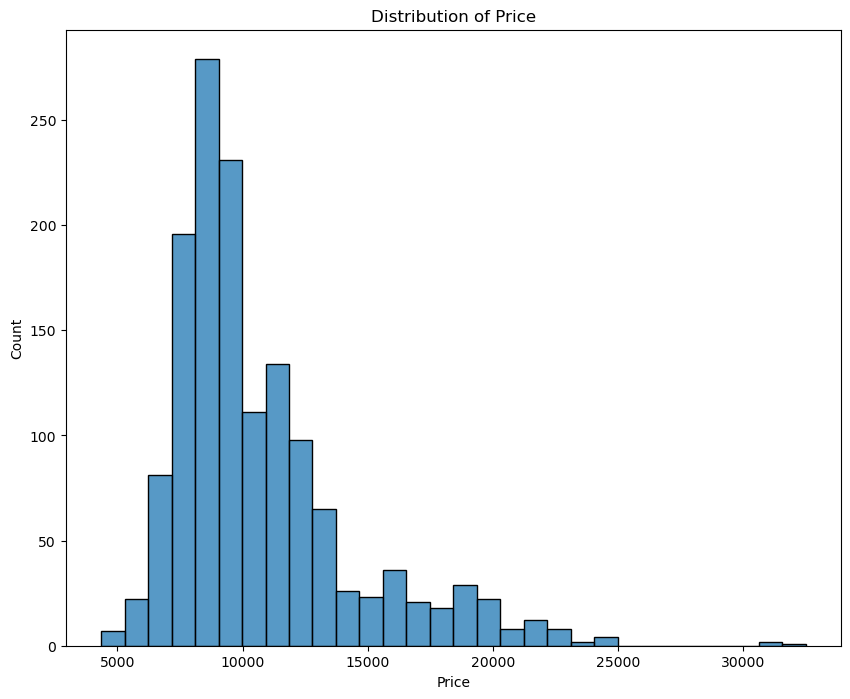

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df['Price'] ,bins=30)
plt.title('Distribution of Price')
plt.show()

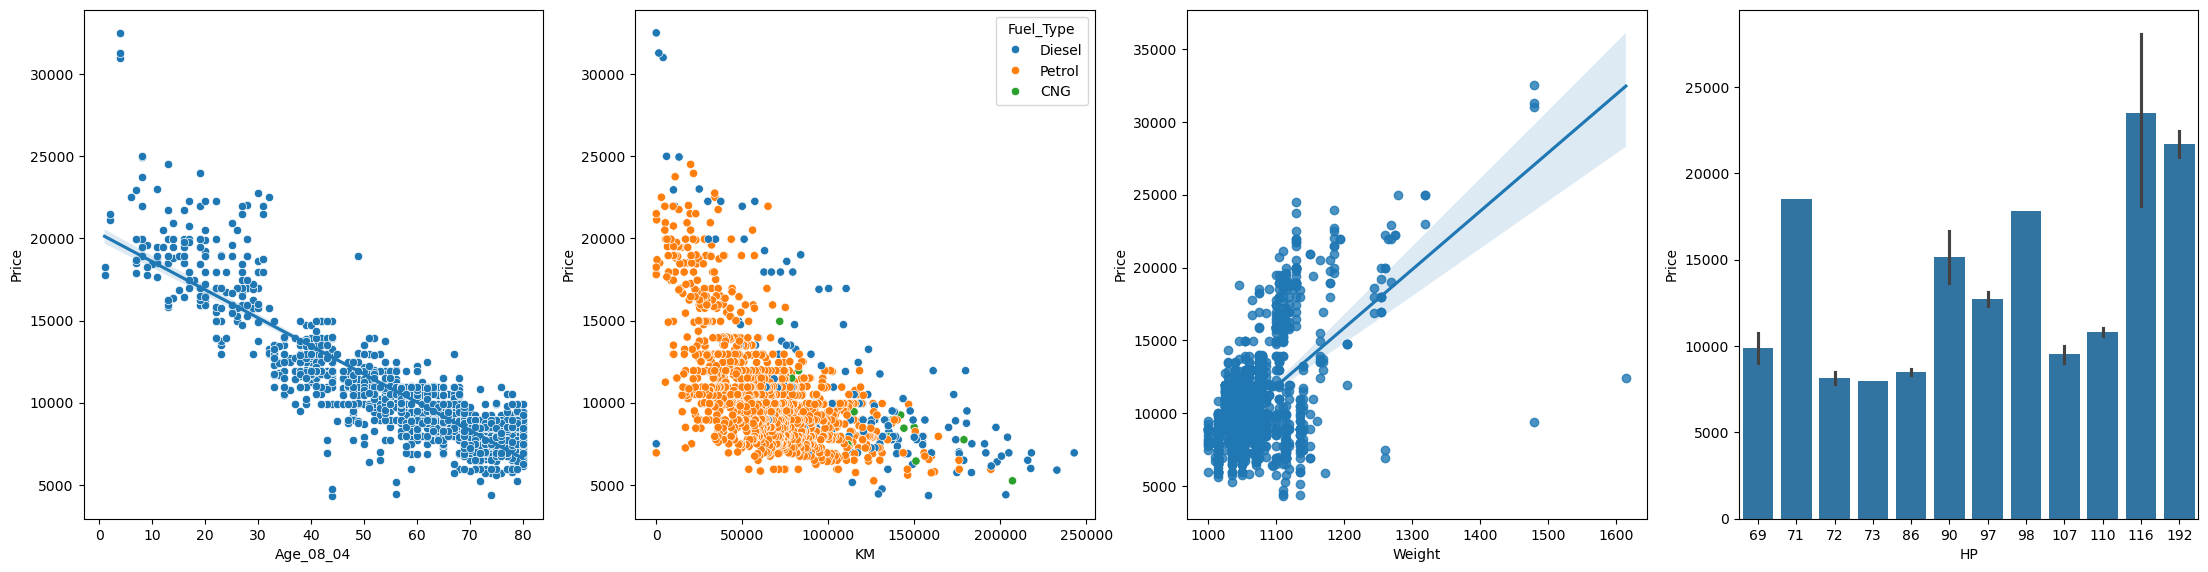

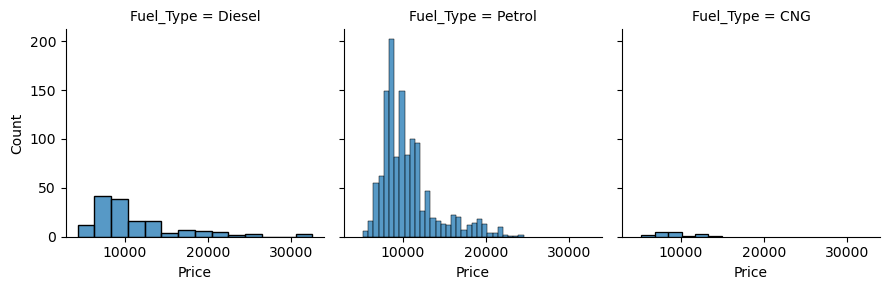

In [12]:
plt.figure(figsize=(70, 78))
plt.subplot(10, 10, 1)
sns.scatterplot(x='Age_08_04', y='Price', data=df)
sns.regplot(x='Age_08_04', y='Price', data=df, scatter=False)

plt.subplot(10,10,2)
sns.scatterplot(x='KM', y='Price', hue='Fuel_Type', data=df)

plt.subplot(10 ,10 ,3)
sns.regplot(x='Weight' ,y='Price' ,data =df )

plt.subplot(10,10,4)
sns.barplot(x='HP' ,y='Price' ,data =df)

sns.FacetGrid(df, col='Fuel_Type').map(sns.histplot, 'Price')

plt.show()

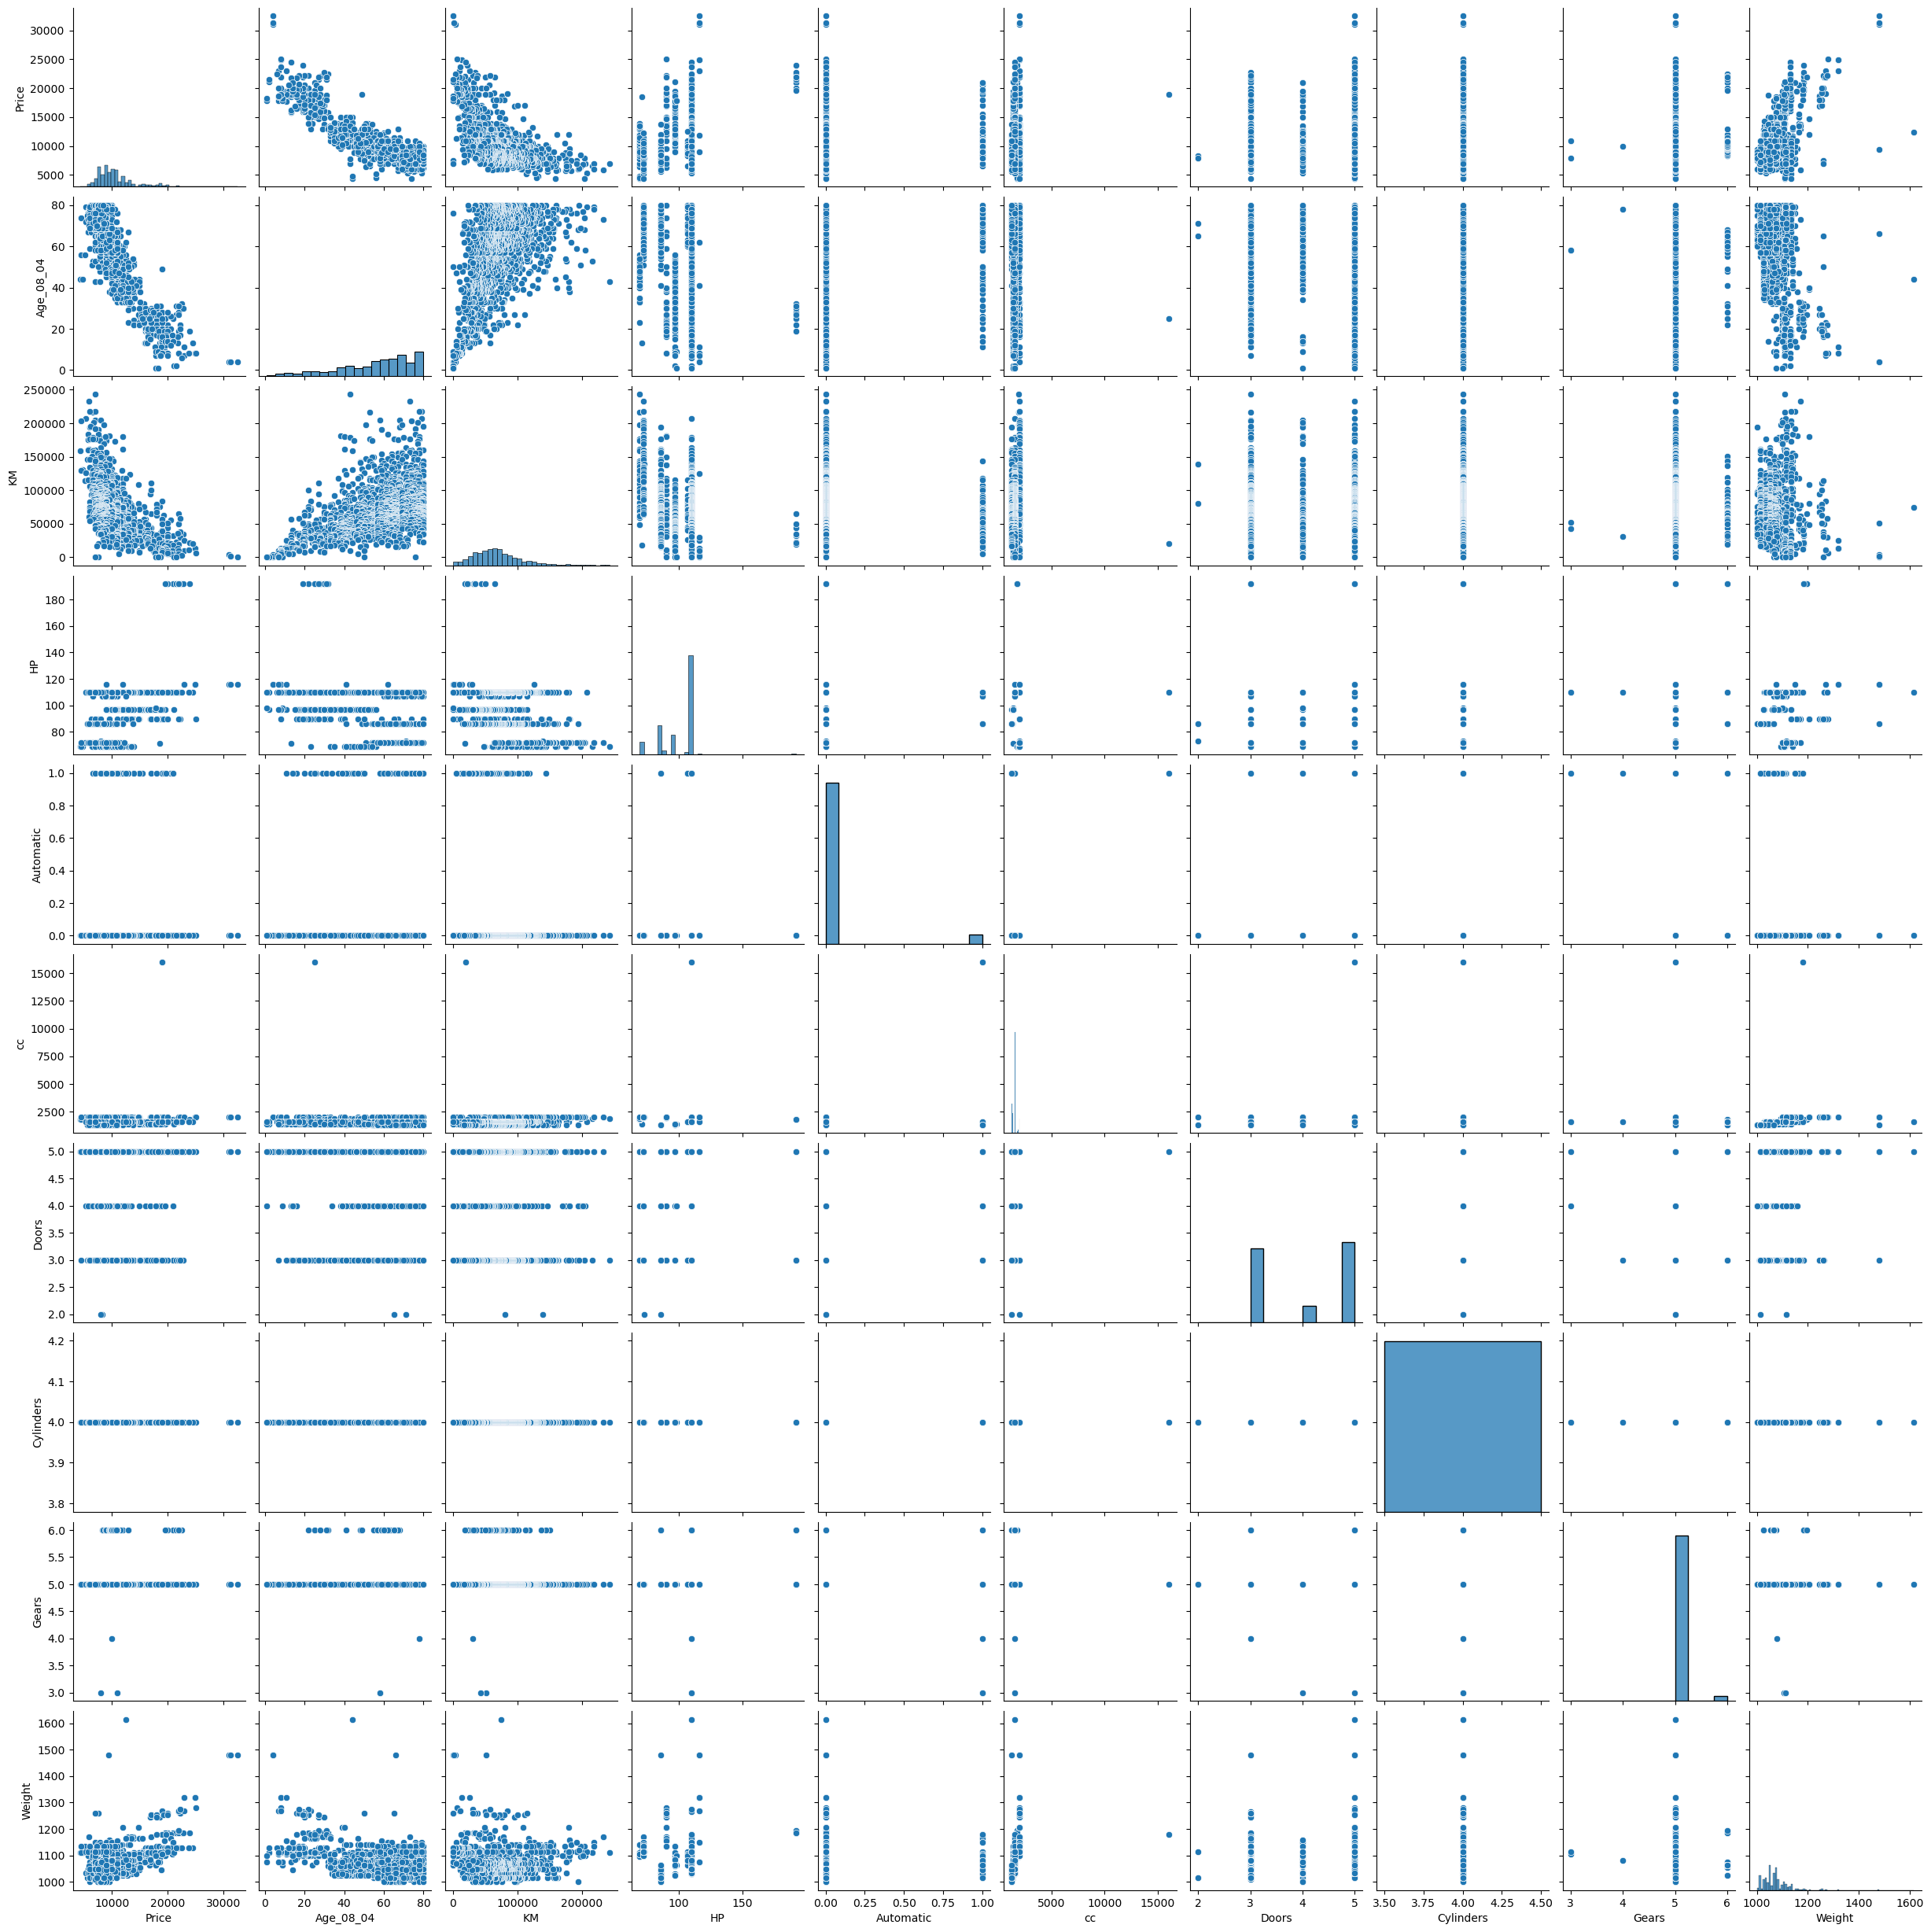

In [13]:
sns.pairplot(df)

In [14]:
data = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

### 4) SPLIT THE DATASET INTO TRAINING AND TESTING SETS (E.G., 80% TRAINING, 20% TESTING) :

In [16]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("X_train : ",X_train.shape)
print("X_test  : ", X_test.shape)
print("y_train : ",y_train.shape)
print("y_test  : ",y_test.shape)

X_train :  (1148, 11)
X_test  :  (288, 11)
y_train :  (1148,)
y_test  :  (288,)


### 5) BUILD A MULTIPLE LINEAR REGRESSION :

In [19]:
model1 = LinearRegression()
model1.fit(X_train[['Age_08_04', 'KM', 'HP']], y_train)

LinearRegression()

In [20]:
model2 = LinearRegression()
model2.fit(X_train[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']], y_train)

LinearRegression()

In [21]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [22]:
print("Model Coefficients : \n")
print("Model 1 :", model1.coef_)
print('\n')
print("Model 2 :", model2.coef_)
print('\n')
print("Model 3 :", model3.coef_)

Model Coefficients : 

Model 1 : [-1.53696216e+02 -1.13134865e-02  3.46719655e+01]


Model 2 : [-1.20759175e+02 -1.98902883e-02  2.91806748e+01  2.96433637e+02
  1.95534191e+01]


Model 3 : [-1.20830458e+02 -1.62314106e-02  1.40394788e+01  1.48830927e+02
 -3.03721946e-02 -6.03109744e+01 -1.10844667e-12  5.51600710e+02
  2.58849583e+01 -6.85487568e+01  1.37080891e+03]


### 6) EVALUATING MODEL PERFORMANCE :

In [24]:
y_pred_mdl1=model1.predict(X_test[['Age_08_04','KM','HP']])
y_pred_mdl2=model2.predict(X_test[['Age_08_04', 'KM', 'HP', 'Automatic', 'Weight']])
y_pred_mdl3=model3.predict(X_test)

In [25]:
def evaluate_model(y_true,y_pred):
    r_squared = r2_score(y_true,y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    return r_squared , mae, mse

In [26]:
results = {}
results['Model 1'] = evaluate_model(y_test, y_pred_mdl1)
results['Model 2'] = evaluate_model(y_test, y_pred_mdl2)
results['Model 3'] = evaluate_model(y_test, y_pred_mdl3)
for model_name, metrics in results.items():
    print(f"{model_name} - R-squared: {metrics[0]:.4f}, MAE: {metrics[1]:.2f}, MSE: {metrics[2]:.2f}")

Model 1 - R-squared: 0.8103, MAE: 1111.54, MSE: 2530780.78
Model 2 - R-squared: 0.8512, MAE: 1001.74, MSE: 1985549.57
Model 3 - R-squared: 0.8349, MAE: 990.89, MSE: 2203043.82


- Model 3 has the highest R-squared value (0.82), indicating it explains more variance in price compared to Models 1 and 2
- The MAE and MSE are also lower for Model 3 compared to the others, suggesting it has better predictive accuracy

### 7) LASSO AND RIDGE METHODS ON THE MODEL :

In [29]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [30]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [31]:
for model in [lasso_model, ridge_model]:
    y_pred = model.predict(X_test)
    print(f"R-squared             : {r2_score(y_test, y_pred)}")
    print(f"Mean Absolute Error   : {mean_absolute_error(y_test, y_pred)}")

R-squared             : 0.8349467801804998
Mean Absolute Error   : 990.8940127223727
R-squared             : 0.834912155924011
Mean Absolute Error   : 990.8701250294985


## **CONCLUTION :**

- Older cars are significantly cheaper due to depreciation.
- Heavier cars generally have higher prices, possibly due to better build quality.
- Cars with higher mileage are priced lower due to wear.
- More powerful engines lead to higher prices.
- Doors, cc, Gears Have minimal impact on price.